# 1)Exploring The Dataset

## 1.1)Import Libraries

In [1]:
import os
os.environ['KERAS_BACKEND']='tensorflow'

# Ignore warnings :
import warnings
warnings.filterwarnings('ignore')


# Handle table-like data and matrices :
import numpy as np
import pandas as pd
import math 
import itertools

# Modelling Algorithms :

# Classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis , QuadraticDiscriminantAnalysis


# Modelling Helpers :
from sklearn.preprocessing import Normalizer , scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV , KFold , cross_val_score


#preprocessing :
from sklearn.preprocessing import MinMaxScaler , StandardScaler, LabelEncoder



#evaluation metrics :

# Regression
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error 

# Classification
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score  


# Deep Learning Libraries
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau, LearningRateScheduler
from keras.utils import to_categorical



# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns



# Configure visualisations
%matplotlib inline
mpl.style.use( 'ggplot' )
plt.style.use('fivethirtyeight')
sns.set(context="notebook", palette="dark", style = 'whitegrid' , color_codes=True)

Using TensorFlow backend.


In [2]:
from keras.utils import np_utils, conv_utils
from keras.optimizers import Adam
from keras.applications.resnet50 import ResNet50
from keras import backend as K
from keras.models import Sequential,Model,load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D,GlobalAveragePooling2D
from keras.callbacks import TensorBoard,ReduceLROnPlateau,ModelCheckpoint

## 1.2)Extract Dataset

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('testX.csv')
df = train.copy()
df_test = test.copy()

In [3]:
df.head()

,Id,Label,1,2,3,4,5,6,7,8,...,775,776,777,778,779,780,781,782,783,784
0,10000,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,10001,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,10002,0,0,0,0,0,0,0,0,0,...,31,9,0,0,0,0,0,0,0,0
3,10003,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,10004,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df_test.head()

,Id,0,1,2,3,4,5,6,7,8,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,1,0,0,0,...,119,114,130,76,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,33,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 1.3)Examine Dimensions

In [5]:
print('Train: ', df.shape)
print('Test: ', df_test.shape)

Train:  (60000, 786)
Test:  (10000, 785)


In [6]:
df["Label"].unique()

array([4, 0, 1, 2, 3], dtype=int64)

## 1.4)Examine NaN Values

In [7]:
# Train
df.isnull().any().sum()

0

In [8]:
# Test
df_test.isnull().any().sum()

0

# 2)Visualizing the Dataset

## 2.1) Plotting Random Images

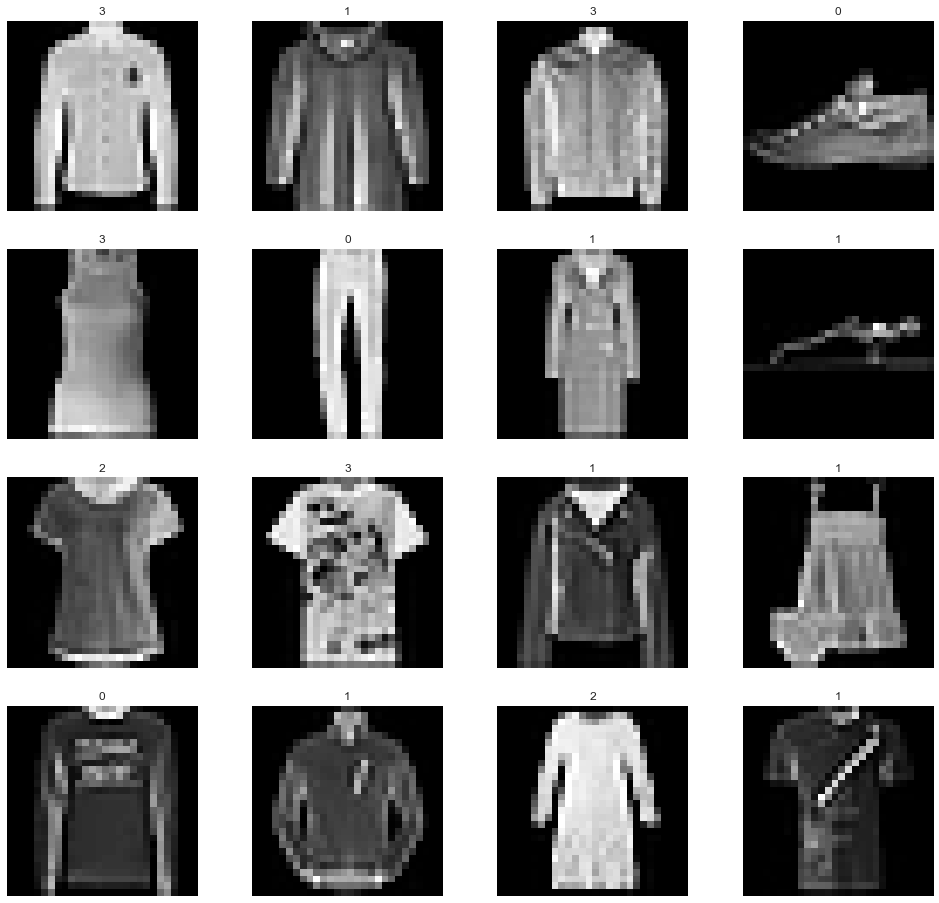

In [12]:
img=df.drop('Id', axis=1)
fig, axes = plt.subplots(4, 4, figsize = (15,15))
for row in axes:
    for axe in row:
        index = np.random.randint(60000)
        imge = img.drop('Label', axis=1).values[index].reshape(28,28)
        cloths = img['Label'][index]
        axe.imshow(imge, cmap='gray')
        axe.set_title(cloths)
        axe.set_axis_off()

## 2.2) Distribution of Labels

In [9]:
df['Label'].value_counts()

4    12067
2    11994
1    11986
3    11978
0    11975
Name: Label, dtype: int64

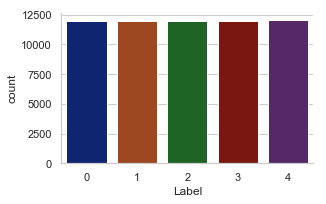

In [10]:
sns.factorplot(x='Label', data=df, kind='count', size=3, aspect= 1.5)

# 3) Data PreProcessing

## 3.1) Setting Random Seeds

In [11]:
# Setting Random Seeds for Reproducibilty.
seed = 66
np.random.seed(seed)

## 3.2) Splitting Data into Train and Validation Set

In [12]:
X = train.iloc[:,2:]
Y = train.iloc[:,1]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=seed)

In [13]:
X.head()

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,31,9,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
Y.head()

0    4
1    0
2    0
3    4
4    1
Name: Label, dtype: int64

## 3.3) Reshaping the Images

In [15]:
x_train = x_train.values.reshape((-1, 28, 28, 1))
x_test = x_test.values.reshape((-1, 28, 28, 1))

df_test.drop('Id' , axis=1, inplace=True)
df_test = df_test.values.reshape((-1, 28, 28, 1))

## 3.4)Normalization

In [16]:
x_train = x_train.astype("float32")/255
x_test = x_test.astype("float32")/255
df_test = df_test.astype("float32")/255

## 3.5) One Hot Encoding

In [17]:
y_train = to_categorical(y_train, num_classes=5)
y_test = to_categorical(y_test, num_classes=5)

In [18]:
print(y_train.shape)
print(y_test.shape)

(54000, 5)
(6000, 5)


# 4)ResNets Model

## Model1

In [39]:
resnet_path = 'resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'

In [40]:
train = pd.read_csv('train.csv')
test = pd.read_csv('testX.csv')
r_test = test.copy()

In [41]:
X = train.iloc[:,2:]
Y = train.iloc[:,1]

r_test.drop('Id', axis=1, inplace=True)
x_train2, x_test2, y_train2, y_test2 = train_test_split(X, Y, test_size=0.1, random_state=seed)

In [42]:
def prepare_data_for_resnet50(data_to_transform):
    data = data_to_transform.copy().values
    data = data.reshape(-1, 28, 28) / 255
    data = X_rgb = np.stack([data, data, data], axis=-1)
    return data

In [43]:
x_train2 = prepare_data_for_resnet50(x_train2)
x_test2 = prepare_data_for_resnet50(x_test2)
r_test= prepare_data_for_resnet50(r_test)

In [44]:
y_train2 = to_categorical(y_train2, num_classes=5)
y_test2 = to_categorical(y_test2, num_classes=5)
print(y_train2.shape)
print(y_test2.shape)

(54000, 5)
(6000, 5)


In [45]:
x_train2.shape

(54000, 28, 28, 3)

In [46]:
model = Sequential()
model.add(ResNet50(include_top=False, pooling='avg', weights=resnet_path))

#model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.25))
#model.add(Dense(64, activation='relu'))
#model.add(Dropout(0.50))
model.add(Dense(5, activation='softmax'))


In [47]:
from keras.optimizers import  Adam
adam = Adam(lr=0.0001)
model.compile(optimizer= adam, loss='categorical_crossentropy', metrics=['accuracy'])

In [48]:
def fit_model(model, epochs=1, train_test_split=0.0):
    model.fit(X_rgb, y, epochs=epochs, validation_split=train_test_split)
    
def get_fitted_data_generator(data):
    data_generator = ImageDataGenerator(rotation_range=10, width_shift_range=0.1,
                                   height_shift_range=0.1, zoom_range=0.1)
    data_generator.fit(data)
    return data_generator
    
def fit_model_generator(model, X_train, y_train, epochs=1, batch=32, validation_data=False, X_val=None, y_val=None):
    image_nbr = np.size(X_train, 0)
    training_data_generator = get_fitted_data_generator(X_train)
    
    if validation_data:
        return model.fit_generator(training_data_generator.flow(X_train, y_train, batch_size=batch), steps_per_epoch=(image_nbr//batch),
                        epochs=epochs, validation_data=(X_val, y_val), verbose=1)
    else:
        return model.fit_generator(training_data_generator.flow(X_train, y_train, batch_size=batch), steps_per_epoch=(image_nbr//batch),
                        epochs=epochs, verbose=1)

In [50]:
history_r = fit_model_generator(model ,x_train2, y_train2, epochs =10,
                              validation_data = True, X_val= x_test2,y_val= y_test2)

Epoch 1/10
1687/1687 [==============================] - 3059s 2s/step - loss: 0.7306 - accuracy: 0.7092 - val_loss: 0.5846 - val_accuracy: 0.7375
Epoch 2/10
1687/1687 [==============================] - 3126s 2s/step - loss: 0.5467 - accuracy: 0.7761 - val_loss: 0.5988 - val_accuracy: 0.7297
Epoch 3/10
1687/1687 [==============================] - 3162s 2s/step - loss: 0.4941 - accuracy: 0.7956 - val_loss: 0.4960 - val_accuracy: 0.8022
Epoch 4/10
1687/1687 [==============================] - 3260s 2s/step - loss: 0.4649 - accuracy: 0.8077 - val_loss: 0.5059 - val_accuracy: 0.7643
Epoch 5/10
1687/1687 [==============================] - 3336s 2s/step - loss: 0.4337 - accuracy: 0.8218 - val_loss: 0.5131 - val_accuracy: 0.7743
Epoch 6/10
1687/1687 [==============================] - 3196s 2s/step - loss: 0.4283 - accuracy: 0.8252 - val_loss: 0.4340 - val_accuracy: 0.8085
Epoch 7/10
1687/1687 [==============================] - 3146s 2s/step - loss: 0.3990 - accuracy: 0.8334 - val_loss: 0.5814 -

In [51]:
score = model.evaluate(x_test2, y_test2)

print('Loss: {:.4f}'.format(score[0]))
print('Accuracy: {:.4f}'.format(score[1]))

6000/6000 [==============================] - 25s 4ms/step
Loss: 0.4385
Accuracy: 0.8053


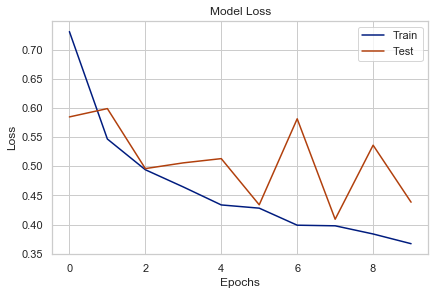

In [52]:
plt.plot(history_r.history['loss'])
plt.plot(history_r.history['val_loss'])
plt.title("Model Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'])
plt.show()

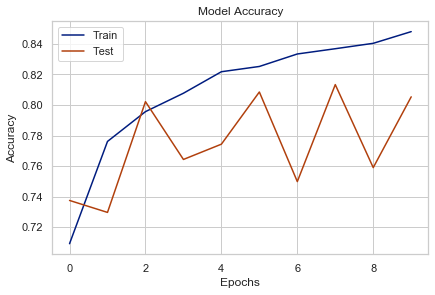

In [54]:
plt.plot(history_r.history['accuracy'])
plt.plot(history_r.history['val_accuracy'])
plt.title("Model Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'])
plt.show()

In [58]:
#Confusion Matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

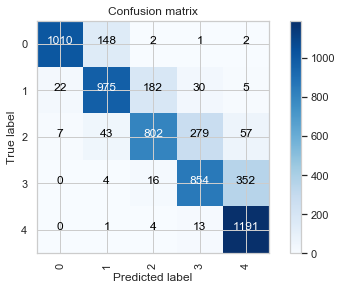

In [61]:
Y_pred = model.predict(x_test2)
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
Y_true = np.argmax(y_test2,axis = 1)
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
plot_confusion_matrix(confusion_mtx, 
            classes = ['0','1','2','3','4'])

In [62]:
#Classification Report
classes = ['0','1','2','3','4']
print(classification_report(Y_true, Y_pred_classes, target_names = classes))

              precision    recall  f1-score   support

           0       0.97      0.87      0.92      1163
           1       0.83      0.80      0.82      1214
           2       0.80      0.68      0.73      1188
           3       0.73      0.70      0.71      1226
           4       0.74      0.99      0.85      1209

    accuracy                           0.81      6000
   macro avg       0.81      0.81      0.80      6000
weighted avg       0.81      0.81      0.80      6000



## Model2

In [19]:
import numpy as np              
import pandas as pd                 
import matplotlib.pyplot as plt

from keras.layers import Input, Conv2D, Activation, BatchNormalization, GlobalAveragePooling2D, Dense, Dropout
from keras.layers.merge import add
from keras.activations import relu, softmax
from keras.models import Model
from keras import regularizers

In [24]:
def block(n_output, upscale=False):
    # n_output: number of feature maps in the block
    # upscale: should we use the 1x1 conv2d mapping for shortcut or not
    
    # keras functional api: return the function of type
    def f(x):
        
        # H_l(x):
        # first pre-activation
        h = Activation(relu)(x)
        # first convolution
        h = Conv2D(kernel_size=(3,3), filters=n_output, strides=1, padding='same', kernel_regularizer=regularizers.l2(0.01))(h)
        
        # second pre-activation
        h = Activation(relu)(x)
        # second convolution
        h = Conv2D(kernel_size=(3,3), filters=n_output, strides=1, padding='same', kernel_regularizer=regularizers.l2(0.01))(h)
        
        # f(x):
        if upscale:
            # 1x1 conv2d
            f = Conv2D(kernel_size=(1,1), filters=n_output, strides=1, padding='same')(x)
        else:
            # identity
            f = x
        
        # F_l(x) = f(x) + H_l(x):
        return add([f, h])
    
    return f

In [ ]:
# input tensor is the 28x28 grayscale image
input_tensor = Input((28, 28, 1))

# first conv2d with post-activation to transform the input data to some reasonable form
x = Conv2D(kernel_size=3, filters=32, strides=1, padding='same', kernel_regularizer=regularizers.l2(0.01))(input_tensor)
x = Activation(relu)(x)

# F_1
x = block(32)(x)

# last activation of the entire network's output
x = Activation(relu)(x)

x = MaxPooling2D(pool_size=(2,2))(x)
x= Flatten()(x)

# dropout for more robust learning
x = Dropout(0.2)(x)

# last softmax layer
x = Dense(5, kernel_regularizer=regularizers.l2(0.01))(x)
x = Activation(softmax)(x)

model = Model(inputs=input_tensor, outputs=x)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [50]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_6 (InputLayer)             (None, 28, 28, 1)     0                                            
____________________________________________________________________________________________________
conv2d_10 (Conv2D)               (None, 28, 28, 64)    640         input_6[0][0]                    
____________________________________________________________________________________________________
activation_16 (Activation)       (None, 28, 28, 64)    0           conv2d_10[0][0]                  
____________________________________________________________________________________________________
activation_18 (Activation)       (None, 28, 28, 64)    0           activation_16[0][0]              
___________________________________________________________________________________________

In [33]:
lr = LearningRateScheduler(lambda x: 1e-3 * 0.9 ** x)

In [36]:
batch_size = 128
epochs = 20
history_r = model.fit(x_train, y_train,batch_size= batch_size, epochs = epochs, verbose=2,
                              validation_data = (x_test, y_test), callbacks=[lr])

Train on 54000 samples, validate on 6000 samples
Epoch 1/20
130s - loss: 0.7394 - acc: 0.7534 - val_loss: 0.7081 - val_acc: 0.7705
Epoch 2/20
130s - loss: 0.7208 - acc: 0.7633 - val_loss: 0.7120 - val_acc: 0.7560
Epoch 3/20
133s - loss: 0.7092 - acc: 0.7690 - val_loss: 0.6832 - val_acc: 0.7863
Epoch 4/20
131s - loss: 0.6967 - acc: 0.7743 - val_loss: 0.6855 - val_acc: 0.7822
Epoch 5/20
130s - loss: 0.6894 - acc: 0.7788 - val_loss: 0.6820 - val_acc: 0.7750
Epoch 6/20
130s - loss: 0.6845 - acc: 0.7808 - val_loss: 0.6735 - val_acc: 0.7847
Epoch 7/20
130s - loss: 0.6765 - acc: 0.7844 - val_loss: 0.6652 - val_acc: 0.7980
Epoch 8/20
132s - loss: 0.6748 - acc: 0.7854 - val_loss: 0.6796 - val_acc: 0.7750
Epoch 9/20
133s - loss: 0.6688 - acc: 0.7890 - val_loss: 0.6630 - val_acc: 0.7888
Epoch 10/20
131s - loss: 0.6656 - acc: 0.7898 - val_loss: 0.6577 - val_acc: 0.7883
Epoch 11/20
132s - loss: 0.6623 - acc: 0.7906 - val_loss: 0.6661 - val_acc: 0.7862
Epoch 12/20
131s - loss: 0.6576 - acc: 0.7923 -

In [41]:
score = model.evaluate(x_test, y_test)

print('Loss: {:.4f}'.format(score[0]))
print('Accuracy: {:.4f}'.format(score[1]))

5984/6000 [============================>.] - ETA: 0sLoss: 0.6347
Accuracy: 0.8047


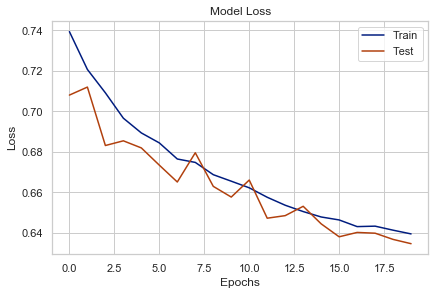

In [42]:
plt.plot(history_r.history['loss'])
plt.plot(history_r.history['val_loss'])
plt.title("Model Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'])
plt.show()

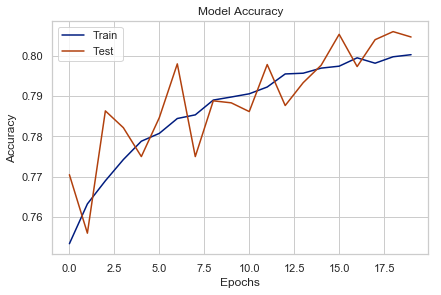

In [44]:
plt.plot(history_r.history['acc'])
plt.plot(history_r.history['val_acc'])
plt.title("Model Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'])
plt.show()

In [45]:
#Confusion Matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

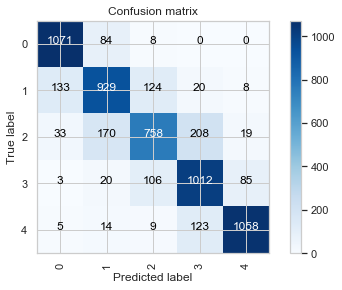

In [48]:
Y_pred = model.predict(x_test)
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
Y_true = np.argmax(y_test,axis = 1)
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
plot_confusion_matrix(confusion_mtx, 
            classes = ['0','1','2','3','4'])

In [49]:
#Classification Report
classes = ['0','1','2','3','4']
print(classification_report(Y_true, Y_pred_classes, target_names = classes))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89      1163
           1       0.76      0.77      0.76      1214
           2       0.75      0.64      0.69      1188
           3       0.74      0.83      0.78      1226
           4       0.90      0.88      0.89      1209

    accuracy                           0.80      6000
   macro avg       0.80      0.80      0.80      6000
weighted avg       0.80      0.80      0.80      6000

